In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
owid = pd.read_csv('owid-covid-data.csv')
mob = pd.read_csv('applemobilitytrends-2020-12-02.csv')
hdi = pd.read_csv('Human development index (HDI).csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

/Users/luisesanlucas/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
owid.tail()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60284,ZWE,Africa,Zimbabwe,2020-11-28,9822.0,108.0,92.857,275.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60285,ZWE,Africa,Zimbabwe,2020-11-29,9822.0,0.0,86.000,275.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60286,ZWE,Africa,Zimbabwe,2020-11-30,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60287,ZWE,Africa,Zimbabwe,2020-12-01,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60288,ZWE,Africa,Zimbabwe,2020-12-02,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [4]:
mob.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,99.44,97.01,94.64,91.62,108.34,124.73,120.86,105.74,97.80,94.97
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,128.61,119.49,122.56,118.68,134.67,135.69,118.89,126.35,123.88,126.48
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,59.53,60.29,63.91,72.30,91.13,87.69,55.07,65.72,70.89,72.47
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,42.96,49.73,53.32,59.24,71.76,60.96,37.25,54.21,61.57,58.88
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,99.52,103.98,107.94,117.86,114.10,92.44,98.94,100.90,105.52,108.80


In [5]:
hdi.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Human development index (HDI)
HDI Rank (2018),Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,0.345,0.347,0.378,0.387,0.400,0.410,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,0.667,0.673,0.680,0.687,0.692,0.702,0.709,0.718,0.724,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,0.638,0.646,0.655,0.666,0.676,0.685,0.694,0.699,0.708,0.711,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
36,Andorra,..,..,..,..,..,..,..,..,..,..,0.759,0.767,0.780,0.820,0.826,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857


In [6]:
x = 'Belgium'


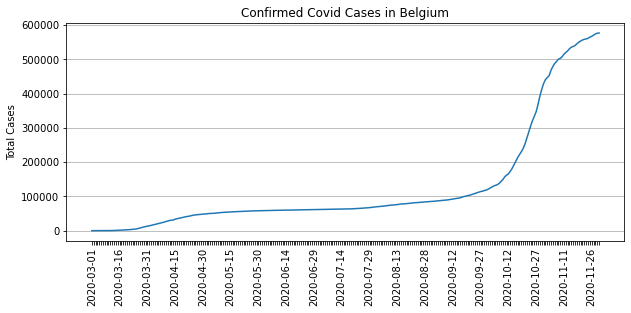

In [7]:
%matplotlib inline
## Plot 1 - Cumulative Confirmed Cases Over Time  for Country X

x_cases = owid.query(f"location == '{x}'")
x_cases = x_cases.loc[(x_cases['date'] >= '2020-03-01') & (x_cases['date'] <= '2020-11-30')]
plot_ = sns.lineplot(data=x_cases, x="date", y="total_cases",hue='location',legend=None)
plt.xticks(rotation=90)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 15 == 0:  # every 15th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title(f'Confirmed Covid Cases in {x}')
plt.ylabel('Total Cases')
plt.xlabel('')
plt.grid(b=True,axis='y')
figure = plt.gcf()

figure.set_size_inches(10, 4)
plt.savefig("plot1.png", dpi=200,format='png',bbox_inches='tight')

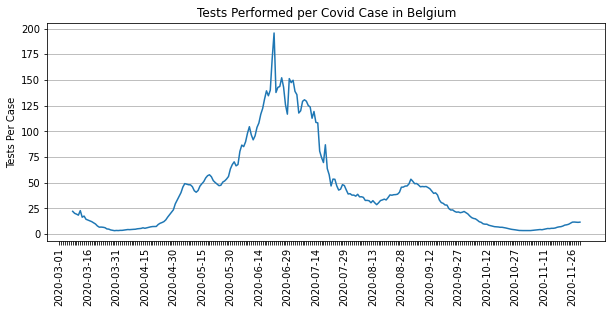

In [8]:
## Plot 2 - Test per Confirmed Case Over Time for Country X

plt.clf()
x_test_per_case = owid.query(f"location == '{x}'")
x_test_per_case = x_test_per_case.loc[(x_test_per_case['date'] >= '2020-03-01') & (x_test_per_case['date'] <= '2020-11-30')]
plot_ = sns.lineplot(data=x_test_per_case, x="date", y="tests_per_case")
plt.xticks(rotation=90)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 15 == 0:  # every 15th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title(f'Tests Performed per Covid Case in {x}')
plt.ylabel('Tests Per Case')
plt.xlabel('')
plt.grid(b=True,axis='y')
figure = plt.gcf()

figure.set_size_inches(10, 4)
plt.savefig("plot2.png", dpi=200,format='png',bbox_inches='tight')

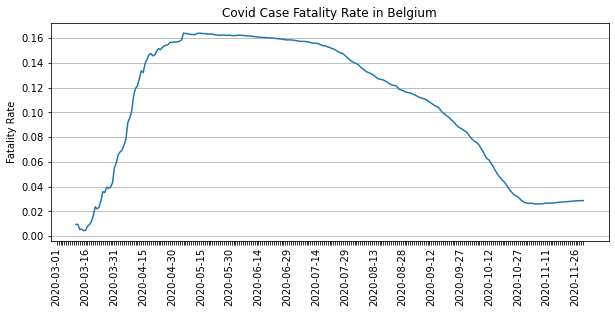

In [9]:
## Plot 3 - Case Fatality Rate Over Time for Country X

plt.clf()
x_deaths_per_case = owid['total_deaths']/owid['total_cases']
owid['deaths_per_case'] = x_deaths_per_case
x_deaths_per_case = owid.query(f"location == '{x}'")
x_deaths_per_case = x_deaths_per_case.loc[(x_deaths_per_case['date'] >= '2020-03-01') & (x_deaths_per_case['date'] <= '2020-11-30')]
plot_ = sns.lineplot(data=x_deaths_per_case, x="date", y="deaths_per_case")
plt.xticks(rotation=90)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 15 == 0:  # every 15th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.title(f'Covid Case Fatality Rate in {x}')
plt.ylabel('Fatality Rate')
plt.xlabel('')
plt.grid(b=True,axis='y')
figure = plt.gcf()

figure.set_size_inches(10, 4)
plt.savefig("plot3.png", dpi=200,format='png',bbox_inches='tight')

/Users/luisesanlucas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


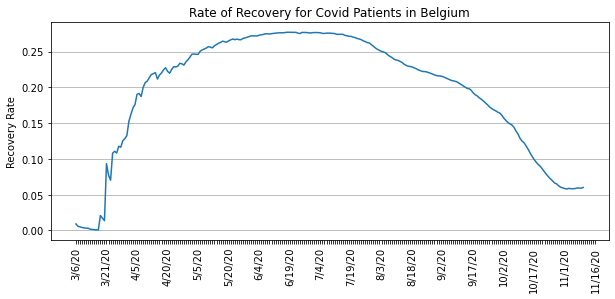

In [18]:
## Plot 4 - Rate of Recovered Cases Over Time for Country X

x_rec1 = recovered.loc[recovered['Country/Region']==x]
x_rec1.drop(['Country/Region','Province/State','Lat','Lat', 'Long'],axis=1,inplace=True)
x_rec = x_rec1.iloc[:,44:300].transpose()
x_rec['date'] = x_rec.index
x_rec['rec'] = x_rec[x_rec.columns[0]]
x_rec = x_rec.drop(x_rec.columns[0],axis=1)
#print(x_rec.columns)
index_list = [i for i in range(x_rec.shape[0])]
x_rec['i'] = index_list
x_rec = x_rec.set_index('i')

x_cases = owid.query(f"location == '{x}'")
x_cases = x_cases.loc[(x_cases['date'] >= '2020-03-06') & (x_cases['date'] <= '2020-11-10')]
x_cases = x_cases.reset_index(drop=True)

x_rec['total_cases'] = x_cases['total_cases']

x_rec['rec_rate'] = x_rec['rec']/x_rec['total_cases']


plot_ = sns.lineplot(data=x_rec, y='rec_rate',x='date')

plt.xticks(rotation=90)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 15 == 0:  # every 15th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title(f'Rate of Recovery for Covid Patients in {x}')
plt.ylabel('Recovery Rate')
plt.xlabel('')
plt.grid(b=True,axis='y')
figure = plt.gcf()

figure.set_size_inches(10, 4)
plt.savefig("plot4.png", dpi=200,format='png',bbox_inches='tight')

/Users/luisesanlucas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


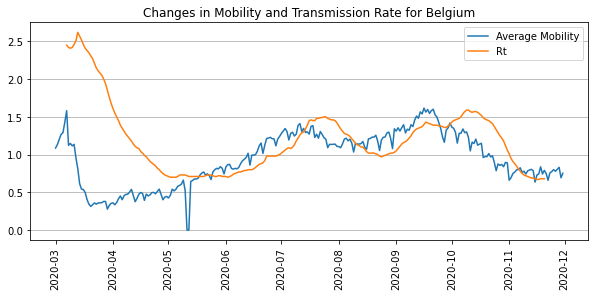

In [11]:
## Plot 6
x_mob = mob.loc[mob['region']==x]

x_mob.drop(['geo_type','region','alternative_name','sub-region','country'],axis=1,inplace=True)

x_mob = x_mob.set_index(['transportation_type'])

x_mob = x_mob.transpose()

#header = x_mob.iloc[0]
#x_mob.columns = header

#x_mob = x_mob.iloc[1:]

x_mob = x_mob/100
x_mob['date'] = x_mob.index.astype('datetime64[ns]')

x_mob = x_mob.iloc[48:323,:]

numerical = x_mob.drop(['date'],axis=1)
x_mob['mob_avg'] = numerical.sum(axis=1)/numerical.shape[1]

x_rt = owid.query(f"location == '{x}'")
x_rt = x_rt.loc[(x_rt['date'] >= '2020-03-01') & (x_rt['date'] <= '2020-11-30')]
x_mob['rt'] = x_rt['reproduction_rate']
x_mob.head(25)

plt.plot(x_mob['date'],x_mob['mob_avg'],label = 'Average Mobility')
plt.plot(x_mob['date'],x_rt['reproduction_rate'],label = 'Rt')

plt.xticks(rotation=90)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 15 == 0:  # every 15th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.legend()
plt.title(f'Changes in Mobility and Transmission Rate for {x}')

plt.grid(b=True,axis='y')
figure = plt.gcf()

figure.set_size_inches(10, 4)
plt.savefig("plot6.png", dpi=200,format='png',bbox_inches='tight')

/Users/luisesanlucas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<Figure size 432x288 with 0 Axes>

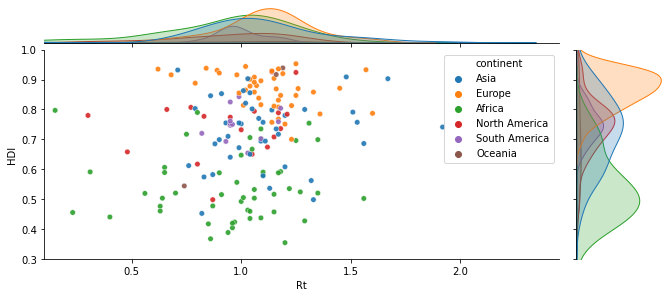

In [12]:
## Plot 8

plt.clf()
current = owid.query("date == '2020-11-20'")
current.to_csv('current.csv')
current['reproduction_rate'].head(20)
current.drop(current.columns.difference(['reproduction_rate','human_development_index','continent','location']), 1, inplace=True)

plot = sns.jointplot(data=current, x='reproduction_rate',y='human_development_index',hue='continent',alpha=0.9,s=30)
plot.ax_marg_x.set_xlim(0.1, 2.45)
plot.ax_marg_y.set_ylim(0.3, 1)

plot.set_axis_labels('Rt', 'HDI', fontsize=10)

#plt.title('Human Development Index vs Transmission Rate',horizontalalignment= 'right')
figure = plt.gcf()

figure.set_size_inches(10, 4)
plt.savefig("plot8.png", dpi=200,format='png',bbox_inches='tight')
